In [1]:
%load_ext autoreload

In [172]:
%autoreload 2
import buy_v_rent as renting
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import buy_v_rent_point_in_time as pit

In [121]:
df = renting.get_data(
    total_years=35,
             initial_rent=1500,
             home_price=850000,
             down_payment_perc=0.20,
             loan_term_years=30,
             loan_interest=0.067,
             property_tax_rate=0.0085,
             stock_interest=.08,
             home_value_interest=.05,
             tenant_rent=1500)

In [122]:
df

,months,year,home_value,property_tax_monthly,home_upkeep_monthly,mortgage_payment,down_payment,remaining_debt,monthly_interest_owed,net_worth_with_home,tenant_rent,paid_towards_home,rent,excess_available_to_invest_monthly_renting,cumulative_invested_renting,net_worth_renting,effective_net_worth_renting,effective_net_worth_with_home
0,0,0.000000,8.500000e+05,602.083333,708.333333,4299.248778,170000,679385.587569,3684.836347,1.706144e+05,1500.000000,174109.665445,1500.000000,172609.665445,1.726097e+05,1.726097e+05,1.467182e+05,1.603775e+05
1,1,0.083333,8.500000e+05,602.083333,708.333333,4299.248778,0,678767.845713,3681.506922,1.712322e+05,1500.000000,4109.665445,1500.000000,2609.665445,1.763299e+05,1.763299e+05,1.498804e+05,1.609582e+05
2,2,0.166667,8.500000e+05,602.083333,708.333333,4299.248778,0,678146.756390,3678.159455,1.718532e+05,1500.000000,4109.665445,1500.000000,2609.665445,1.800741e+05,1.800741e+05,1.530630e+05,1.615420e+05
3,3,0.250000,8.500000e+05,602.083333,708.333333,4299.248778,0,677522.301460,3674.793848,1.724777e+05,1500.000000,4109.665445,1500.000000,2609.665445,1.838424e+05,1.838424e+05,1.562660e+05,1.621290e+05
4,4,0.333333,8.500000e+05,602.083333,708.333333,4299.248778,0,676894.462685,3671.410004,1.731055e+05,1500.000000,4109.665445,1500.000000,2609.665445,1.876349e+05,1.876349e+05,1.594896e+05,1.627192e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,34.583333,4.465346e+06,3162.953256,3721.121478,0.000000,0,0.000000,0.000000,4.465346e+06,7880.021954,-995.947219,7880.021954,-8875.969173,4.821081e+06,4.821081e+06,4.097919e+06,4.197425e+06
416,416,34.666667,4.465346e+06,3162.953256,3721.121478,0.000000,0,0.000000,0.000000,4.465346e+06,7880.021954,-995.947219,7880.021954,-8875.969173,4.843224e+06,4.843224e+06,4.116740e+06,4.197425e+06
417,417,34.750000,4.465346e+06,3162.953256,3721.121478,0.000000,0,0.000000,0.000000,4.465346e+06,7880.021954,-995.947219,7880.021954,-8875.969173,4.865509e+06,4.865509e+06,4.135683e+06,4.197425e+06
418,418,34.833333,4.465346e+06,3162.953256,3721.121478,0.000000,0,0.000000,0.000000,4.465346e+06,7880.021954,-995.947219,7880.021954,-8875.969173,4.887938e+06,4.887938e+06,4.154747e+06,4.197425e+06


In [123]:
def plot_dataframe_columns(df, x_column='months'): 
    """
    Generates separate Plotly line graphs for each column in a DataFrame, 
    except for the specified x-axis column.

    Args:
      df: pandas DataFrame.
      x_column: str, name of the column to use for the x-axis. 
               Defaults to 'months'.
    """
    
    for column in df.columns:
        if column == x_column:
            continue

        fig = px.line(df, x=x_column, y=column, title=f"{column} over Time")
        fig.show()

In [124]:
def create_stacked_bar_with_total_line(df, x_col, y_cols, signs=None):
    """
    Creates a stacked bar chart with a line representing the total of all values.

    Args:
      df: pandas DataFrame containing the data.
      x_col: Name of the column to use for the x-axis (time).
      y_cols: List of names of the columns to use for the y-axis (values).

    Returns:
      A Plotly Figure object.
    """
    if signs is None:
        signs = [1]* len(y_cols)
    fig = go.Figure()

    for i, col in enumerate(y_cols):
        fig.add_trace(go.Bar(name=col, x=df[x_col], y=signs[i]*df[col]))

    # Calculate the total of all y-columns
    df['Total'] = sum([signs[i] * df[col] for i, col in enumerate(y_cols)]) 
    fig.add_trace(go.Scatter(name='Total', x=df[x_col], y=df['Total'], mode='lines+markers'))

    fig.update_layout(barmode='relative', bargap=0)  # Set bargap to 0 for a continuous look

    return fig


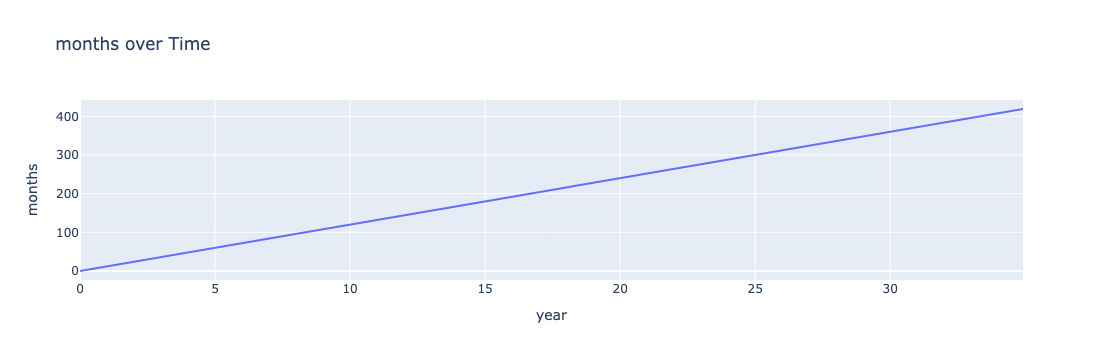

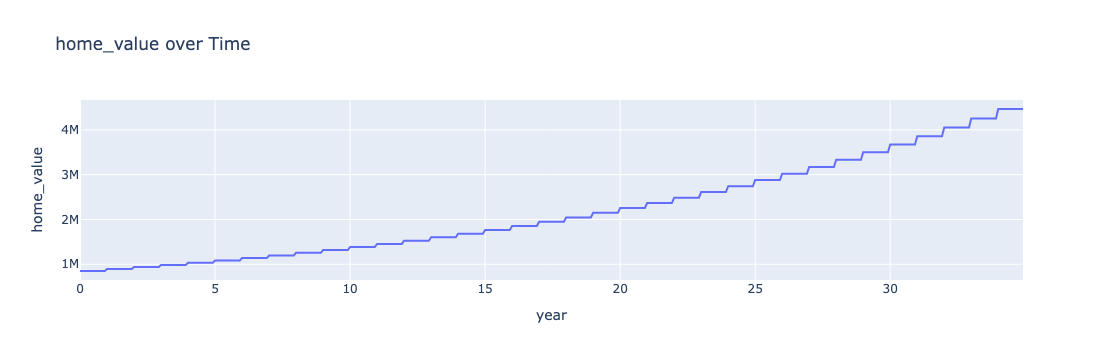

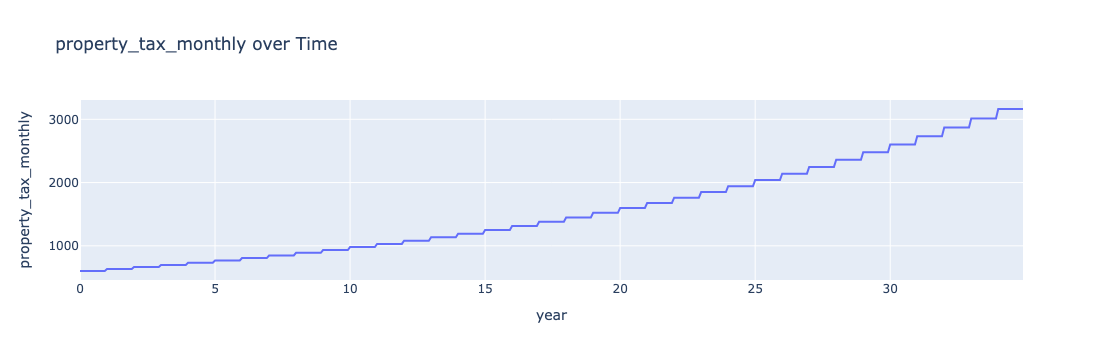

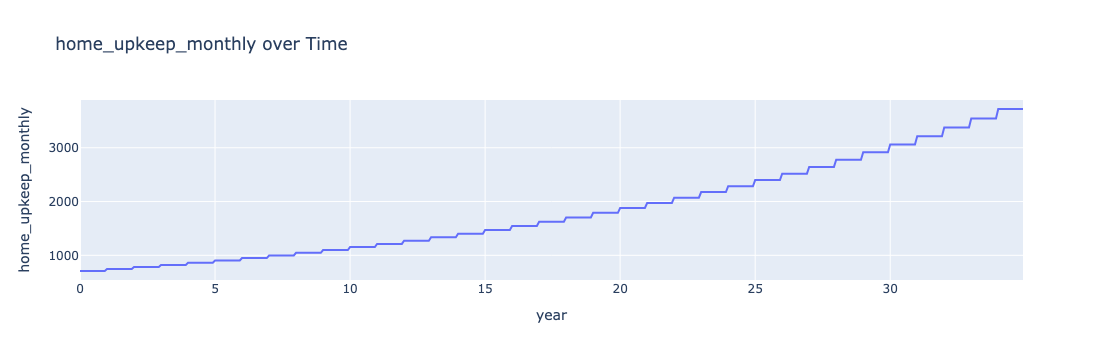

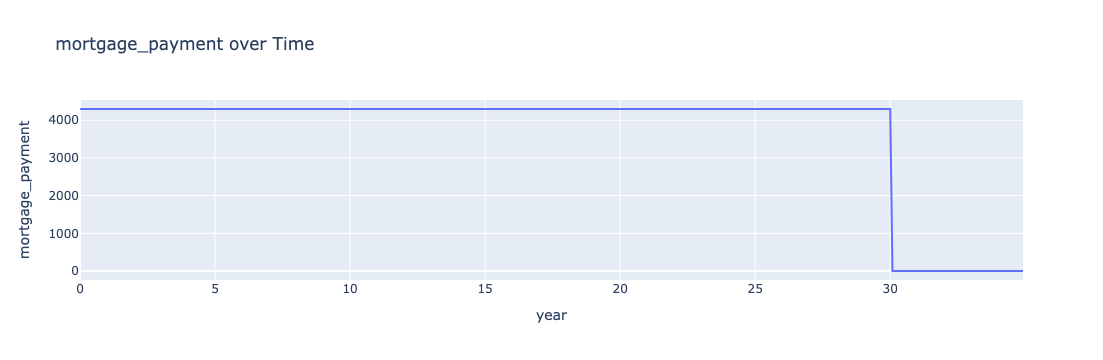

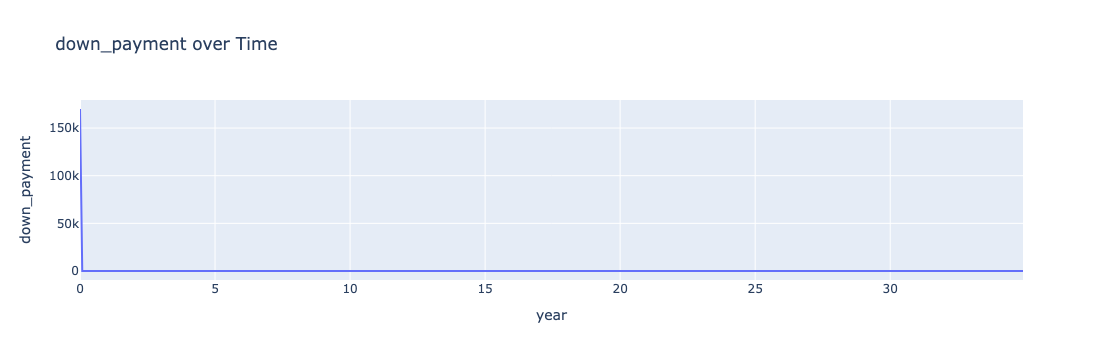

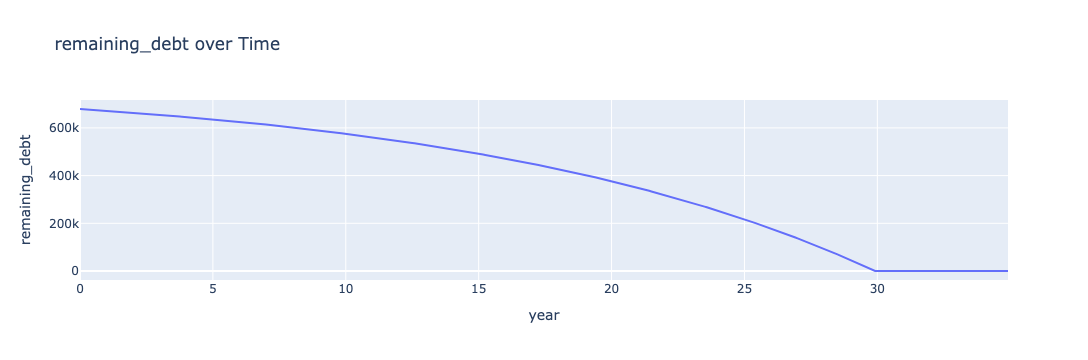

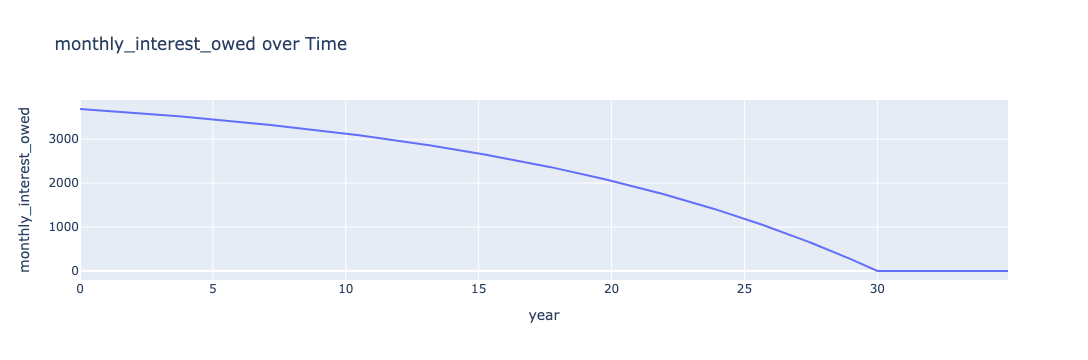

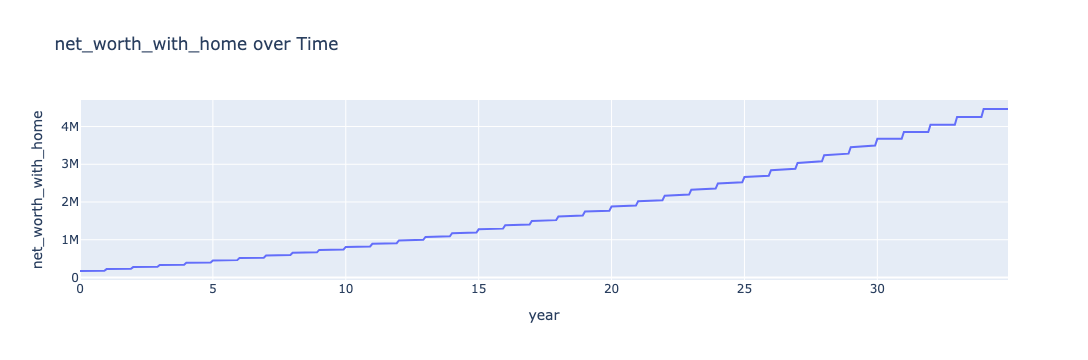

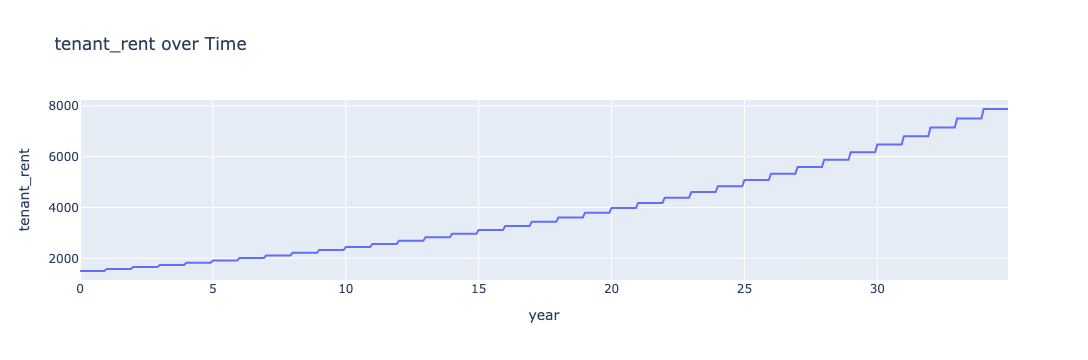

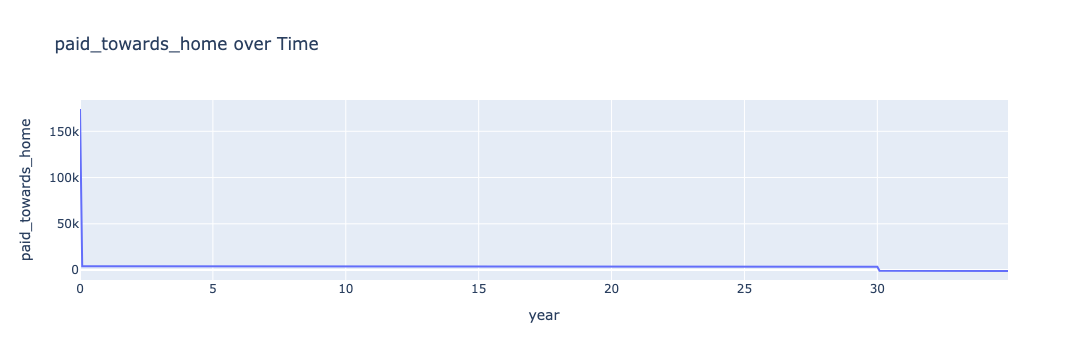

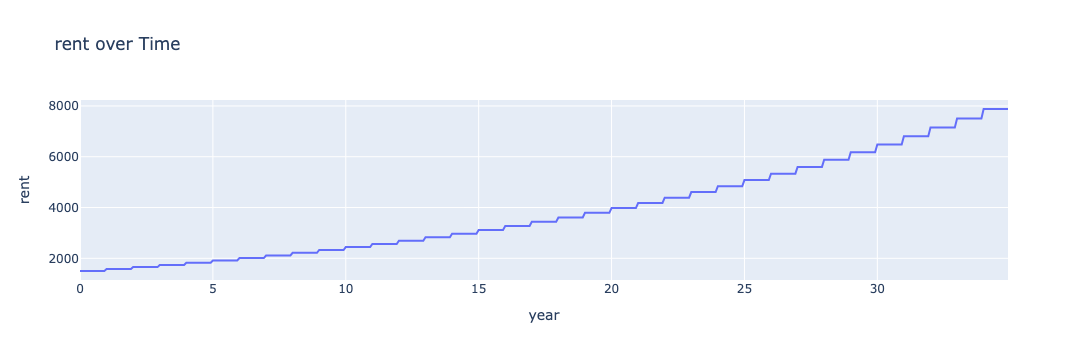

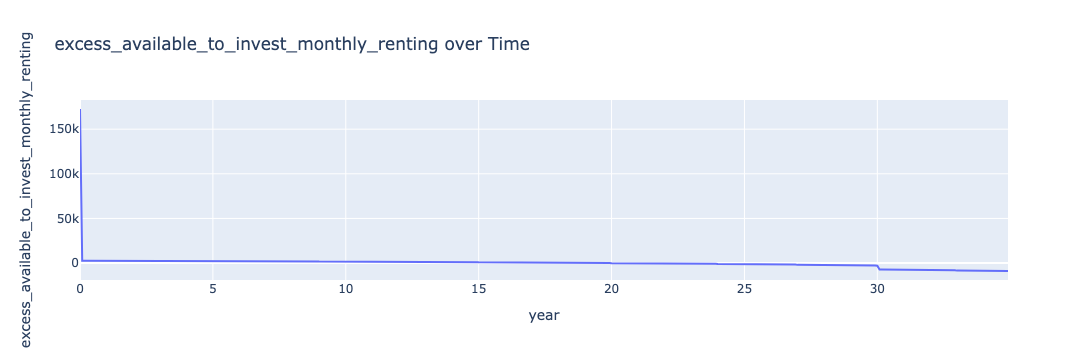

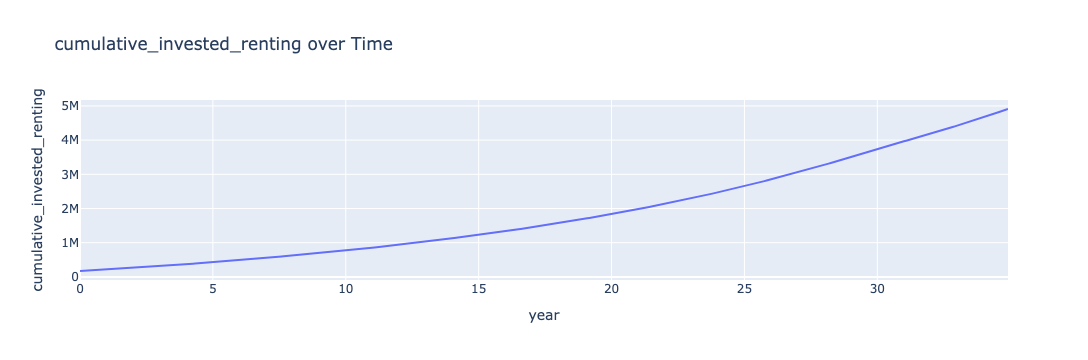

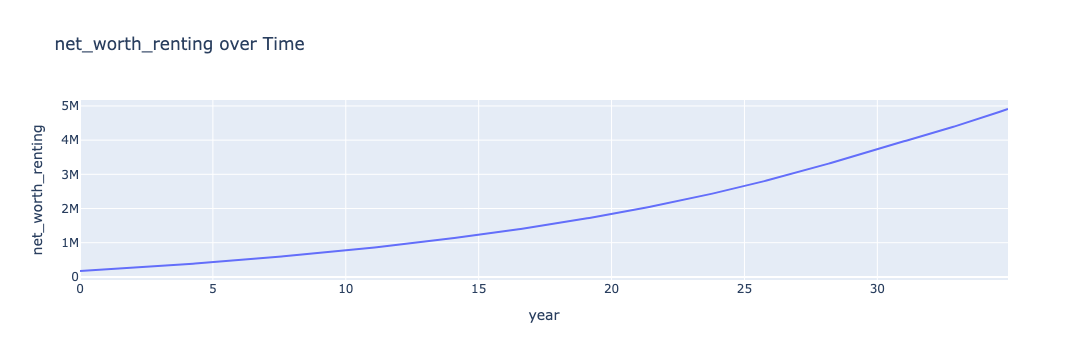

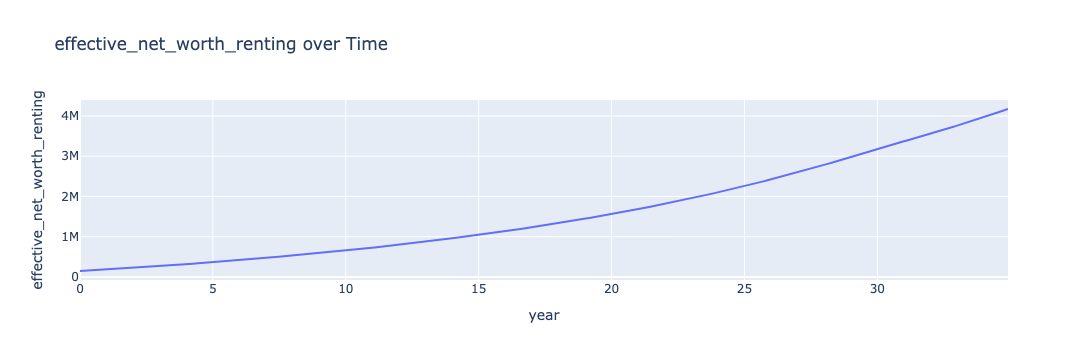

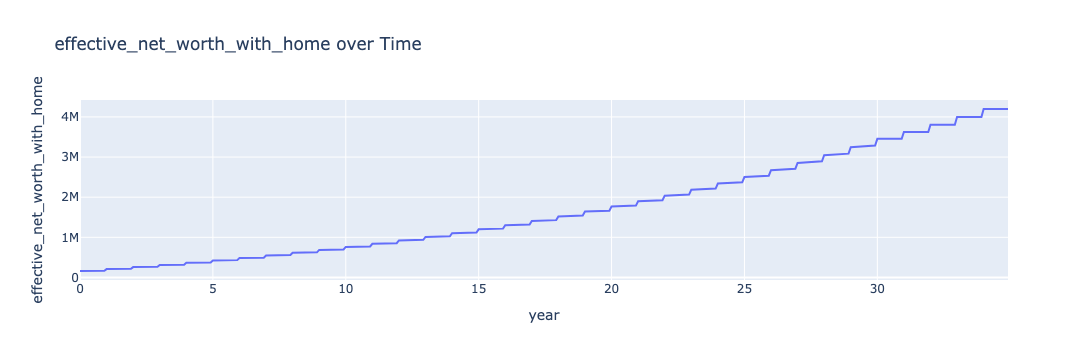

In [125]:
# Plot each column (except 'months')
plot_dataframe_columns(df, x_column='year') 

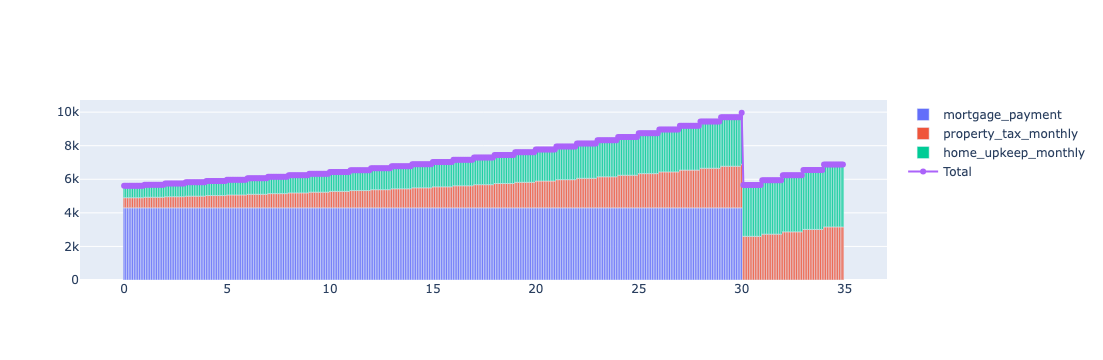

In [126]:
create_stacked_bar_with_total_line(df, 'year', ['mortgage_payment', 'property_tax_monthly', 'home_upkeep_monthly'], [1,1,1])

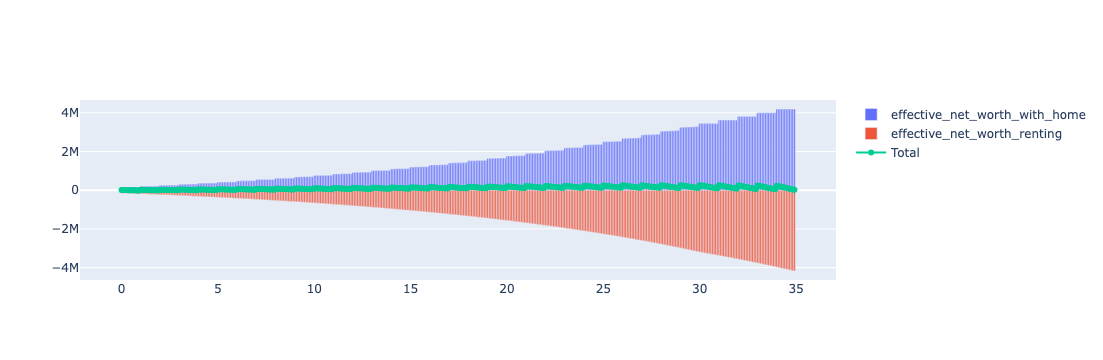

In [127]:
create_stacked_bar_with_total_line(df, 'year', ['effective_net_worth_with_home', 'effective_net_worth_renting'], [1,-1])

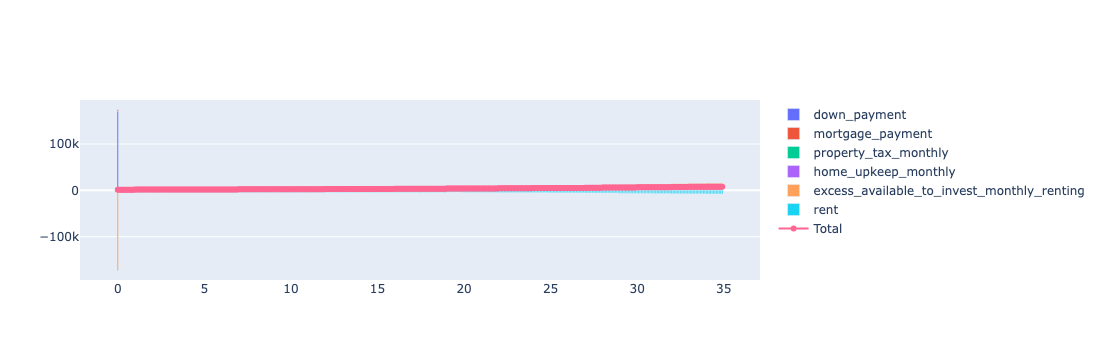

In [131]:
# Money flow
create_stacked_bar_with_total_line(df, 'year', 
                                   ['down_payment', 'mortgage_payment', 'property_tax_monthly', 'home_upkeep_monthly', 'excess_available_to_invest_monthly_renting', 'rent'],
                                   [1,1,1,1,-1,-1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['home_owned', 'cumulative property_tax', 'cumulative interest lost to property tax', 'interest lost to down payment', 'cumulative investment after mortgage'], [1,-1,-1,-1,1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['cumulative investment while renting', 'real price of rent', 'invested instead of downpayment'], [1,-1,1])


In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['buying', 'renting'], [1, 1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['home_owned',
                                                'cumulative investment after mortgage',
                                                'cumulative property_tax',
                                                'cumulative interest lost to property tax',
                                                'interest lost to down payment',],
                                   [1,1,-1,-1,-1])

In [ ]:
create_stacked_bar_with_total_line(df, 'year', ['diff'], [1])

In [ ]:
import plotly.graph_objects as go

# Sample data
categories = ['Category A', 'Category B', 'Category C']
positive_values = [10, 15, 8]
positive2_values = [11, 13, 8]
negative_values = [-5, -3, 12]

# Calculate the sum of all values
total_values = [sum(x) for x in zip(positive_values, positive2_values, negative_values)]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=categories, y=positive_values),
    go.Bar(name='Positive2', x=categories, y=positive2_values),
    go.Bar(name='Negative', x=categories, y=negative_values),
    go.Scatter(name='Total', x=categories, y=total_values, mode='lines+markers') 
])

# Set barmode to 'relative'
fig.update_layout(barmode='relative')

fig.show()


In [ ]:
1500*.054

In [168]:
result = pit.get_data_at_year(
    target_year=5,
             initial_rent=1500,
             home_price=850000,
             down_payment_perc=0.10,
             loan_term_years=30,
             loan_interest=0.067,
             property_tax_rate=0.0085,
             stock_interest=.08,
             home_value_interest=.06,
             tenant_rent_initial=1000)
print("BUY") if result['effective_net_worth_with_home'] > result['effective_net_worth_renting'] else print("rent")
result['effective_net_worth_with_home'] - result['effective_net_worth_renting']

BUY


30143.367341414967

In [183]:
import numpy as np

# Constants
total_years = 35
initial_rent = 1500
home_price = 800000
loan_term_years = 30
loan_interest = 0.065
property_tax_rate = 0.085
stock_interest=0.08
home_value_interest=.06
down_payment_perc=.20
tenant_rent_initial=1500

# Parameter ranges
param_ranges = {
    #"stock_interest": (.03, .13, .01),
    "loan_interest": (0.04, 0.07, 0.002),
    #"home_value_interest": (0.02, 0.07, 0.003),
    "down_payment_perc": (0.05, 0.4, .01),
    "home_price": (500000, 1200000, 50000)
}

# Call the function
results = pit.grid_search_buying_diff(
    at_year=total_years,
    initial_rent=initial_rent,
    loan_term_years=loan_term_years,
    property_tax_rate=property_tax_rate,
    param_ranges=param_ranges,
    stock_interest=stock_interest,
    home_value_interest=home_value_interest,
    #home_price=home_price,
    #loan_interest=loan_interest,
    #down_payment_perc=down_payment_perc
    tenant_rent_initial=tenant_rent_initial
)

print(results.keys())

dict_keys(['results', 'param_values'])


In [184]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np
app = dash.Dash(__name__)

keys = list(results['param_values'].keys())

app.layout = html.Div([
    html.H1("3D Array Heatmap Slicer"),
    dcc.Dropdown(
        id='slider-param',
        options=[{'label': k, 'value': k} for k in keys],
        value=keys[0]  # Default slider parameter
    ),
    dcc.Slider(
        id='slice-slider',
        min=0,
        max=results['results'].shape[0] - 1, 
        step=1,
        value=0,
        marks={}  # Marks will be updated based on selected parameter
    ),
    dcc.Graph(id='heatmap-graph'),
])

old_slider_param = None

@app.callback(
    [Output('slice-slider', 'max'),
     Output('slice-slider', 'marks'),
     Output('slice-slider', 'value'),
     Output('heatmap-graph', 'figure')],
    [Input('slider-param', 'value'),
     Input('slice-slider', 'value')]
)
def update_heatmap(slider_param, slice_index):
    global old_slider_param 
    global keys
    # Determine dimensions based on selected slider parameter
    if slider_param!=old_slider_param:
        slice_index=0
        old_slider_param = slider_param
    
    print("KEYS", keys)
    slider_dim = keys.index(slider_param)
    other_dims = [i for i in range(3) if i != slider_dim]
    x_dim, y_dim = other_dims
    
    zmin = results['results'].min()
    zmax = results['results'].max()

    zdiff = zmax - zmin
    zmid = 0
    # Normalize the values to the range [0, 1]
    norm_zmax = (zmax - zmin) / zdiff
    norm_zmid = (zmid - zmin) / zdiff
    norm_zmin = (zmin - zmin) / zdiff

    colorscale = [
        [norm_zmin, 'red'],
        [norm_zmid, 'white'],
        [norm_zmax, 'green'],
    ]
    if zmin >0 or zmax < 0:   
        colorscale = [
            [0, 'red'],
            [.5, 'white'],
            [1, 'green'],
        ]
    print(colorscale, "CCCCCCCCC")

    # Update slider properties
    slider_max = results['results'].shape[slider_dim] - 1
    slider_marks = {i: f"{results['param_values'][slider_param][i]:.3f}" 
                    for i in range(results['results'].shape[slider_dim])}

    # Extract data for the heatmap
    z_data = np.moveaxis(results['results'], slider_dim, 0)[slice_index]
    print(z_data.shape, "SHAPE")

    custom_data = np.repeat(results['param_values'][slider_param][slice_index], 
                             z_data.shape[1]).reshape(1, -1) 
    custom_data = np.repeat(results['param_values'][slider_param][slice_index], z_data.size).reshape(z_data.shape)
 
    # Create the heatmap figure
    fig = go.Figure(data=go.Heatmap(
        z=z_data.T,
        x=results['param_values'][keys[x_dim]],
        y=results['param_values'][keys[y_dim]],
hovertemplate=('<b>' + slider_param + ':</b> %{customdata:.3f}<br>' +
                      '<b>' + keys[x_dim] + ':</b> %{x:.2f}<br>' +
                      '<b>' + keys[y_dim] + ':</b> %{y:.2f}<br>' +
                      '<b>Value:</b> %{z:,.0f}<extra></extra>'),  # Corrected line
        customdata=custom_data,
        zmin=zmin,
        zmax=zmax,
        colorscale=colorscale,
    ))

    fig.add_trace(go.Contour(
        z=z_data.T,
        x=results['param_values'][keys[x_dim]],
        y=results['param_values'][keys[y_dim]],
        contours=dict(
            start=0,
            end=0,
            size=0.5,  # Adjust the size as needed
            coloring='lines' 
        ),
        line_width=2,  # Adjust line width as needed
        showscale=False  # Hide the color scale for the contour
    ))

    fig.update_layout(
        xaxis_title=keys[x_dim],
        yaxis_title=keys[y_dim]
    )
    return slider_max, slider_marks, slice_index, fig

if __name__ == '__main__':
    app.run_server(debug=True)

KEYS ['loan_interest', 'down_payment_perc', 'home_price']
[[0, 'red'], [0.5, 'white'], [1, 'green']] CCCCCCCCC
(35, 14) SHAPE
KEYS ['loan_interest', 'down_payment_perc', 'home_price']
[[0, 'red'], [0.5, 'white'], [1, 'green']] CCCCCCCCC
(35, 14) SHAPE
KEYS ['loan_interest', 'down_payment_perc', 'home_price']
[[0, 'red'], [0.5, 'white'], [1, 'green']] CCCCCCCCC
(16, 14) SHAPE
KEYS ['loan_interest', 'down_payment_perc', 'home_price']
[[0, 'red'], [0.5, 'white'], [1, 'green']] CCCCCCCCC
(16, 14) SHAPE
KEYS ['loan_interest', 'down_payment_perc', 'home_price']
[[0, 'red'], [0.5, 'white'], [1, 'green']] CCCCCCCCC
(16, 14) SHAPE
KEYS ['loan_interest', 'down_payment_perc', 'home_price']
[[0, 'red'], [0.5, 'white'], [1, 'green']] CCCCCCCCC
(16, 14) SHAPE
KEYS ['loan_interest', 'down_payment_perc', 'home_price']
[[0, 'red'], [0.5, 'white'], [1, 'green']] CCCCCCCCC
(16, 14) SHAPE
KEYS ['loan_interest', 'down_payment_perc', 'home_price']
[[0, 'red'], [0.5, 'white'], [1, 'green']] CCCCCCCCC
(16, 14